[[35. 32. 30. ... 44. 29. 45.]
 [32. 30. 31. ... 29. 45. 43.]
 [30. 31. 44. ... 45. 43. 38.]
 ...
 [34. 39. 35. ... 47. 52. 39.]
 [39. 35. 52. ... 52. 39. 40.]
 [35. 52. 47. ... 39. 40. 42.]]
>expected=42.0, predicted=45.3
[[35. 32. 30. ... 44. 29. 45.]
 [32. 30. 31. ... 29. 45. 43.]
 [30. 31. 44. ... 45. 43. 38.]
 ...
 [39. 35. 52. ... 52. 39. 40.]
 [35. 52. 47. ... 39. 40. 42.]
 [52. 47. 52. ... 40. 42. 42.]]
>expected=53.0, predicted=43.5
[[35. 32. 30. ... 44. 29. 45.]
 [32. 30. 31. ... 29. 45. 43.]
 [30. 31. 44. ... 45. 43. 38.]
 ...
 [35. 52. 47. ... 39. 40. 42.]
 [52. 47. 52. ... 40. 42. 42.]
 [47. 52. 39. ... 42. 42. 53.]]
>expected=39.0, predicted=41.4
[[35. 32. 30. ... 44. 29. 45.]
 [32. 30. 31. ... 29. 45. 43.]
 [30. 31. 44. ... 45. 43. 38.]
 ...
 [52. 47. 52. ... 40. 42. 42.]
 [47. 52. 39. ... 42. 42. 53.]
 [52. 39. 40. ... 42. 53. 39.]]
>expected=40.0, predicted=38.6
[[35. 32. 30. ... 44. 29. 45.]
 [32. 30. 31. ... 29. 45. 43.]
 [30. 31. 44. ... 45. 43. 38.]
 ...
 [47. 52. 

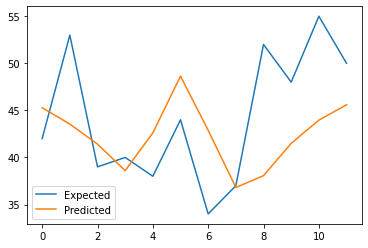

In [2]:
# forecast monthly births with random forest
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    print(train)
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

# load the dataset
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
# print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('username', 'api_key')
trace1 = {
  "uid": "a3ef8890-a3fc-4027-bcb5-ee70a04b54db", 
  "line": {
    "color": "rgba(31, 119, 180, 0.40)", 
    "width": 0.1
  }, 
  "mode": "lines", 
  "name": "", 
  "type": "scatter", 
  "x": [1279, 4159, 7038, 9918, 12798], 
  "y": [1.0, 1.0, 1.0, 1.0, 1.0], 
  "hoverlabel": {"namelength": 20}, 
  "showlegend": False
}
trace2 = {
  "uid": "1cd5df9b-7bbe-4970-97a5-c2bf8b0b2b97", 
  "fill": "tonexty", 
  "line": {
    "color": "rgba(31, 119, 180, 0.40)", 
    "width": 0.1
  }, 
  "mode": "lines", 
  "name": "", 
  "type": "scatter", 
  "x": [1279, 4159, 7038, 9918, 12798], 
  "y": [1.0, 1.0, 1.0, 1.0, 1.0], 
  "hoverlabel": {"namelength": 20}, 
  "showlegend": False
}
trace3 = {
  "uid": "14b460dd-6d99-4266-aa81-24ffd7506653", 
  "line": {"color": "rgb(31, 119, 180)"}, 
  "name": "Train score", 
  "type": "scatter", 
  "x": [1279, 4159, 7038, 9918, 12798], 
  "y": [1.0, 1.0, 1.0, 1.0, 1.0], 
  "showlegend": True
}
trace4 = {
  "uid": "7f2e4d20-81e0-446a-91d0-c0824323341b", 
  "line": {
    "color": "rgba(255, 127, 14, 0.40)", 
    "width": 0.1
  }, 
  "mode": "lines", 
  "name": "", 
  "type": "scatter", 
  "x": [1279, 4159, 7038, 9918, 12798], 
  "y": [0.9853028418064331, 0.9863228473498344, 0.9876161472870806, 0.9877280693986803, 0.9884986173251042], 
  "hoverlabel": {"namelength": 20}, 
  "showlegend": False
}
trace5 = {
  "uid": "49de63c2-356e-4a73-942f-fbfad7b78d96", 
  "fill": "tonexty", 
  "line": {
    "color": "rgba(255, 127, 14, 0.40)", 
    "width": 0.1
  }, 
  "mode": "lines", 
  "name": "", 
  "type": "scatter", 
  "x": [1279, 4159, 7038, 9918, 12798], 
  "y": [0.9884463741366736, 0.9894263297382193, 0.9902585767737058, 0.9900216937368174, 0.9905011459568318], 
  "hoverlabel": {"namelength": 20}, 
  "showlegend": False
}
trace6 = {
  "uid": "11a85e1b-6548-48a9-98a1-cd99632ed8d3", 
  "line": {"color": "rgb(255, 127, 14)"}, 
  "name": "Test score", 
  "type": "scatter", 
  "x": [1279, 4159, 7038, 9918, 12798], 
  "y": [0.9868746079715534, 0.9878745885440269, 0.9889373620303932, 0.9888748815677488, 0.989499881640968], 
  "showlegend": True
}
data = Data([trace1, trace2, trace3, trace4, trace5, trace6])
layout = {
  "title": {"text": "Learning Curve of Random Forest"}, 
  "xaxis": {"title": {"text": "#Training samples"}}, 
  "yaxis": {"title": {"text": "Accuracy"}}, 
  "legend": {
    "x": 0.8, 
    "y": 0
  }, 
  "autosize": True
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)